#Vericação dos filmes movielens

In [187]:
import pandas as pd


In [188]:
filmes = pd.read_csv('movies.csv')

In [189]:
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Alterando os nomes das colunas

In [190]:
filmes.columns = ['filme_id','titulo','generos']
filmes.head(1)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


#Alteração no index do dataframe! Por que?
Para ficar mais fácil de localizar os registros

In [191]:
filmes = filmes.set_index('filme_id')
filmes.head(1)

,titulo,generos
filme_id,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [192]:
filmes.loc[5]

titulo     Father of the Bride Part II (1995)
generos                                Comedy
Name: 5, dtype: object

In [193]:
notas = pd.read_csv('ratings.csv')
notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Entrengando recomendação para um usuário desconhecido
Como?
Verificando a popularidade

In [194]:
notas.describe()


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [195]:
#alteração nos nomes das colunas
notas.columns = ['usuario_id','filme_id','notas','hora_da_avaliacao']
notas.head(1)

,usuario_id,filme_id,notas,hora_da_avaliacao
0,1,1,4.0,964982703


In [196]:
#verificando os mais votados - não quer dizer que são os mais bem avaliados
notas['filme_id'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
152085      1
164367      1
98799       1
4573        1
6141        1
Name: filme_id, Length: 9724, dtype: int64

In [197]:
filmes.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

#Criando uma nova coluna no df de filmes para mostrar o total de votos por filme

In [198]:
total_de_votos = notas['filme_id'].value_counts()
total_de_votos

356       329
318       317
296       307
593       279
2571      278
         ... 
152085      1
164367      1
98799       1
4573        1
6141        1
Name: filme_id, Length: 9724, dtype: int64

In [199]:
#colocando o total de votos em uma nova coluna do dataframe filmes
filmes['total_de_votos'] = total_de_votos

In [200]:
filmes.head(10)

,titulo,generos,total_de_votos
filme_id,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0
6,Heat (1995),Action|Crime|Thriller,102.0
7,Sabrina (1995),Comedy|Romance,54.0
8,Tom and Huck (1995),Adventure|Children,8.0
9,Sudden Death (1995),Action,16.0


In [201]:
filmes.loc[356]

titulo                 Forrest Gump (1994)
generos           Comedy|Drama|Romance|War
total_de_votos                       329.0
Name: 356, dtype: object

In [202]:
filmes.sort_values('total_de_votos',ascending=False).head(5)

,titulo,generos,total_de_votos
filme_id,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [203]:
notas.tail(5)

,usuario_id,filme_id,notas,hora_da_avaliacao
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [204]:
#agrupar os filmes do dataframe notas por filme_id
notas.groupby('filme_id').mean()['notas']

filme_id
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: notas, Length: 9724, dtype: float64

In [205]:
filmes.head(5)

,titulo,generos,total_de_votos
filme_id,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [206]:
notas_medias = notas.groupby('filme_id').mean()['notas']

In [207]:
#podemos criar mais uma coluna no dataframe filmes com as notas médias
filmes['notas_medias'] = notas_medias
filmes.head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [208]:
filmes.sort_values('total_de_votos',ascending=False).head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446


In [209]:
#ordenando o dataframe por nota média
filmes.sort_values('notas_medias',ascending=False).head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0


In [210]:
filmes.query('total_de_votos >= 50').sort_values('notas_medias',ascending=False).head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041


In [211]:
filmes_do_usuario = [165,1276,1,66]
filmes_do_usuario

[165, 1276, 1, 66]

In [212]:
filmes.loc[filmes_do_usuario]

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
165,Die Hard: With a Vengeance (1995),Action|Crime|Thriller,144.0,3.555556
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,9.0,2.500000


In [213]:
#criar um dataframe que vai ter só os filmes "mais relavantes"
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185


In [214]:
#provaveis filmes dos generos que o usuario alvo assistou
filmes_generos_alvo = filmes_com_mais_de_50_votos.query("generos == 'Adventure|Animation|Children|Comedy|Fantasy'").sort_values('notas_medias',ascending=False).head(10)
filmes_generos_alvo

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,132.0,3.871212
3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,97.0,3.860825


In [215]:
#filmes_generos_alvo.loc[165]

In [216]:
filmes_do_usuario = [165,1276,1,66,6874,54286]
filmes_do_usuario

[165, 1276, 1, 66, 6874, 54286]

In [217]:
#excluir os filmes que o usuário já assistiu das prováveis recomendações
filmes_generos_alvo.drop(filmes_do_usuario,errors='ignore').sort_values('notas_medias',ascending=False).head(5)

,titulo,generos,total_de_votos,notas_medias
filme_id,,,,
4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,132.0,3.871212
3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,97.0,3.860825


#Colaboratividade => votos e nas notas
#Distancia entre dois usuários

ricardo deu nota 5 para o filme matrix

pedro deu nota 4 para o filme matrix

leandro deu nota 3 para o filme matrix

rosa deu nota 3.5 para o filme matrix

não existe distancia negativa!!!!!



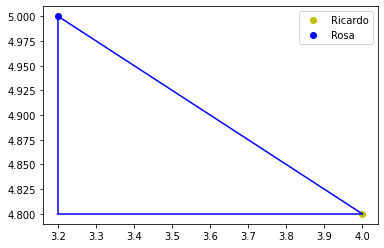

In [218]:
#somatorio de diferença




import matplotlib.pyplot as plt
plt.plot(4,4.8,"yo")
plt.plot(3.2,5,"bo")
plt.legend(["Ricardo","Rosa"])

plt.plot([4,3.2],[4.8,4.8], color="blue")
plt.plot([3.2,3.2],[5,4.8], color="blue")
plt.plot([3.2,4],[5,4.8], color="blue")


In [219]:
#calculo da diferença entre dois usuários
#somatorio das substrações das notas x_i e y_i

#a_2 = b_2 + c_2

import numpy as np
ricardo = np.array([4,4.8])
rosa = np.array([3.2,5])

#4         #4.8
#3.2       #5
#0.8       #0.2


#print(pitagoras(ricardo,rosa))

In [220]:
from math import sqrt

def pitagoras(usuariox,usuarioy):
  (delta_x,delta_y) = usuariox - usuarioy
  valor = sqrt(delta_x * delta_x + delta_y * delta_y)
  return valor

In [221]:
np.linalg.norm(ricardo - rosa)

0.8246211251235319

In [222]:
ricardo = np.array([3.9,4.8])
tom = np.array([3.2,4.5])
paulo = np.array([3.9,4.8])

print(pitagoras(ricardo, rosa))
print(pitagoras(ricardo,tom))
print(pitagoras(ricardo,paulo))

0.7280109889280516
0.7615773105863906
0.0


In [223]:
#olhando o nosso conjutno de dados Notas
notas.head(5)

,usuario_id,filme_id,notas,hora_da_avaliacao
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [224]:
#analisando as similaridades do usuário 1
notas.query("usuario_id == 2")
notas_do_usuario = notas.query("usuario_id == 2")
#vamos indexar o index com o filme_id
notas_do_usuario = notas_do_usuario[['filme_id','notas']].set_index('filme_id')
notas_do_usuario

,notas
filme_id,
318,3.0
333,4.0
1704,4.5
3578,4.0
6874,4.0
8798,3.5
46970,4.0
48516,4.0
58559,4.5


In [225]:
#funcao que recebe usuario id para consultar e trazer em uma lista as notas do alvo
def busca_notas_usuario(usuario_id):
  notas_do_usuario = notas.query("usuario_id == %d" % usuario_id)
  notas_do_usuario = notas_do_usuario[['filme_id','notas']].set_index('filme_id')
  return notas_do_usuario


In [226]:
usuario_x = busca_notas_usuario(1)
usuario_y = busca_notas_usuario(5)

In [227]:
usuario_x.head(5)

,notas
filme_id,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [228]:
usuario_y.head(10)

,notas
filme_id,
1,4.0
21,4.0
34,4.0
36,4.0
39,3.0
50,4.0
58,5.0
110,4.0
150,3.0


In [229]:
#criando o join para registrar na mesma tabela a nota dos dois.
usuario_x.join(usuario_y,lsuffix="_x",rsuffix="_y").head(10)

,notas_x,notas_y
filme_id,,
1,4.0,4.0
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,4.0
70,3.0,NaN
101,5.0,NaN
110,4.0,4.0
151,5.0,NaN


In [230]:
#deletando as linhas com NaN - dessa forma vai sobrar só o que é comum entre os dois comparados
diferencas = usuario_x.join(usuario_y,lsuffix="_x",rsuffix="_y").dropna()

In [231]:
#utilizando a função norm do np
def calculo_distancia_vetores(usuariox,usuarioy):
  return np.linalg.norm(usuariox - usuarioy)

In [232]:
usuario_x = busca_notas_usuario(38)
usuario_y = busca_notas_usuario(55)

In [233]:
#usuarios sendo verificados são o com id = 1 e id = 5
calculo_distancia_vetores(diferencas['notas_x'],diferencas['notas_y'])

3.7416573867739413

In [234]:
def distancia_de_usuarios(usuario_idx,usuario_idy):
  #primeiro passo é buscando as notas do alvo e de alguém a ser comparado
  notas_x = busca_notas_usuario(usuario_idx)
  notas_y = busca_notas_usuario(usuario_idy)
  #segundo passo é buscar as diferencas
  diferencas = notas_x.join(notas_y,lsuffix="_x",rsuffix="_y").dropna()
  #terceiro passo é calcular as diferencas
  distancia = calculo_distancia_vetores(diferencas['notas_x'],diferencas['notas_y'])
  return [usuario_idx,usuario_idy,distancia]


In [235]:
distancia_de_usuarios(1,5)

[1, 5, 3.7416573867739413]

In [236]:
def distancia_de_todos(usuario_alvo_id):
  #dicionario para guardar as distancias de todos os outros
  distancias_para_outros_usuarios = []
  #for para percorrer as notsa e encontrar os outros
  for usuario_id in notas['usuario_id'].unique():
    informacoes = distancia_de_usuarios(usuario_alvo_id,usuario_id)
    distancias_para_outros_usuarios.append(informacoes)
  distancias_para_outros_usuarios = pd.DataFrame(distancias_para_outros_usuarios,columns=['Usuario_alvo','Outro_usuario','Distancia'])
  return distancias_para_outros_usuarios

In [237]:
distancia_de_todos(3)

,Usuario_alvo,Outro_usuario,Distancia
0,3,1,8.200610
1,3,2,0.000000
2,3,3,0.000000
3,3,4,4.500000
4,3,5,4.500000
...,...,...,...
605,3,606,9.759611
606,3,607,6.062178
607,3,608,7.968689
608,3,609,0.000000


In [238]:
busca_notas_usuario(3)

,notas
filme_id,
31,0.5
527,0.5
647,0.5
688,0.5
720,0.5
849,5.0
914,0.5
1093,0.5
1124,0.5


In [239]:
def compara_usuarios(usuariox,usuarioy):
  comparacao = busca_notas_usuario(usuariox).join(busca_notas_usuario(usuarioy),lsuffix="_alvo",rsuffix="_outro").dropna()
  return comparacao

In [240]:
compara_usuarios(3,2)

,notas_alvo,notas_outro
filme_id,,


In [241]:
def menu():
    opcao = False
    while opcao == False:
        print("\nEscolha o número da opção: ")
        print("\n(1) Notas do usuário alvo")
        print("\n(2) Distância entre dois usuários")
        print("\n(3) Distância de todos usuários")
        print("\n(4) Compara dois usuários")
        opcao_escolhida = input("\nA opcão escolhida foi =>\n")
        try:
            opcao_escolhida = int(opcao_escolhida)
            if (opcao_escolhida < 1) or (opcao_escolhida > 4):
                print('\nO número não se encontra entre 1 e 4')
            else:
                opcao = True
        except:
            print("\nDigite um número de 1 a 4")
    return(opcao_escolhida)

continuar = 'S'
while continuar.upper() != 'N':
    opcao_escolhida = menu()
    if opcao_escolhida == 1:
        usuario_escolhido = int(input('\nDigite o código do usuário\n'))
        usuario_x = busca_notas_usuario(usuario_escolhido)
        print(usuario_x.head(5))
    elif opcao_escolhida == 2:
        usuario_escolhido_1 = int(input('Digite o código do primeiro usuário\n'))
        usuario_escolhido_2 = int(input('Digite o código do segundo usuário\n'))
        distancia_de_usuarios = distancia_de_usuarios(usuario_escolhido_1,usuario_escolhido_2)
        print(distancia_de_usuarios)
    elif opcao_escolhida == 3:
        usuario_escolhido = int(input('\nDigite o código do usuário\n'))
        usuario_x = distancia_de_todos(usuario_escolhido)
        print(usuario_x)
    else:
        usuario_escolhido_1 = int(input('\nDigite o código do primeiro usuário\n'))
        usuario_escolhido_2 = int(input('\nDigite o código do segundo usuário\n'))
        compara_usuarios = compara_usuarios(usuario_escolhido_1,usuario_escolhido_2)
        print(compara_usuarios)

    continuar = input("\nDeseja realizar outra consulta? (S|N)\n")

print("Fim")


Escolha o número da opção: 

(1) Notas do usuário alvo

(2) Distância entre dois usuários

(3) Distância de todos usuários

(4) Compara dois usuários
          notas
filme_id       
1           4.0
3           4.0
6           4.0
47          5.0
50          5.0

Escolha o número da opção: 

(1) Notas do usuário alvo

(2) Distância entre dois usuários

(3) Distância de todos usuários

(4) Compara dois usuários
[1, 2, 1.4142135623730951]
Fim
